In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../data/CCLE_NP24.2009_Drug_data_2015.02.24.csv")
print df.head()

             CCLE Cell Line Name Primary Cell Line Name Compound Target  \
0  1321N1_CENTRAL_NERVOUS_SYSTEM                 1321N1   AEW541  IGF1R   
1                 22RV1_PROSTATE                  22Rv1   AEW541  IGF1R   
2  42MGBA_CENTRAL_NERVOUS_SYSTEM               42-MG-BA   AEW541  IGF1R   
3             5637_URINARY_TRACT                   5637   AEW541  IGF1R   
4             639V_URINARY_TRACT                  639-V   AEW541  IGF1R   

                             Doses (uM)  \
0  .0025,.0080,.025,.080,.25,.80,2.53,8   
1  .0025,.0080,.025,.080,.25,.80,2.53,8   
2  .0025,.0080,.025,.080,.25,.80,2.53,8   
3  .0025,.0080,.025,.080,.25,.80,2.53,8   
4  .0025,.0080,.025,.080,.25,.80,2.53,8   

                  Activity Data (median)  \
0     8.67,11.0,2.16,.27,-10,-13,-26,-43   
1      .94,12.5,-14,4.16,-25,-32,-52,-71   
2  8.91,8.39,-3.5,12.4,-.55,-6.2,-48,-63   
3   2.15,9.91,-3.5,.056,-2.1,-14,-30,-62   
4     11.8,-7.3,-9.4,-15,-11,-21,-53,-50   

                         

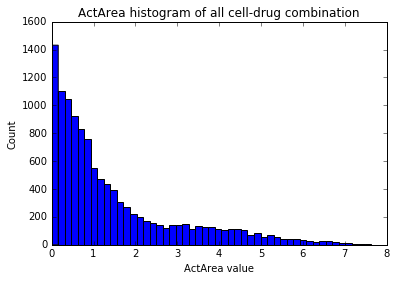

In [5]:
plt.hist(df.ActArea, bins=50)
plt.title("ActArea histogram of all cell-drug combination")
plt.xlabel("ActArea value")
plt.ylabel("Count")

In [16]:
print np.percentile(df.ActArea, 99.9)
print np.percentile(df.ActArea, 0.1)

7.3322988
0.0


In [17]:
def min_max_scaler(n):
    min = 0
    max = 7.3322988
    if n < min:
        return 0
    elif n > max:
        return 1
    else:
        return (n - min)/(max - min)

In [19]:
df["ScaledActArea"] = df['ActArea'].apply(min_max_scaler)

In [20]:
print df.head()

             CCLE Cell Line Name Primary Cell Line Name Compound Target  \
0  1321N1_CENTRAL_NERVOUS_SYSTEM                 1321N1   AEW541  IGF1R   
1                 22RV1_PROSTATE                  22Rv1   AEW541  IGF1R   
2  42MGBA_CENTRAL_NERVOUS_SYSTEM               42-MG-BA   AEW541  IGF1R   
3             5637_URINARY_TRACT                   5637   AEW541  IGF1R   
4             639V_URINARY_TRACT                  639-V   AEW541  IGF1R   

                             Doses (uM)  \
0  .0025,.0080,.025,.080,.25,.80,2.53,8   
1  .0025,.0080,.025,.080,.25,.80,2.53,8   
2  .0025,.0080,.025,.080,.25,.80,2.53,8   
3  .0025,.0080,.025,.080,.25,.80,2.53,8   
4  .0025,.0080,.025,.080,.25,.80,2.53,8   

                  Activity Data (median)  \
0     8.67,11.0,2.16,.27,-10,-13,-26,-43   
1      .94,12.5,-14,4.16,-25,-32,-52,-71   
2  8.91,8.39,-3.5,12.4,-.55,-6.2,-48,-63   
3   2.15,9.91,-3.5,.056,-2.1,-14,-30,-62   
4     11.8,-7.3,-9.4,-15,-11,-21,-53,-50   

                         

In [26]:
toy_drugs = ["Erlotinib", "Nutlin-3", "LBW242", "17-AAG"]
toy_cell_lines = ["IGROV1_OVARY", "COLO741_SKIN", "TC71_BONE", "HPAFII_PANCREAS", "NCIH1792_LUNG"]
toy_df = df[df.Compound.isin(toy_drugs)]
toy_df = toy_df[toy_df["CCLE Cell Line Name"].isin(toy_cell_lines)]
print toy_df[["CCLE Cell Line Name", "Compound", "Target", "ScaledActArea"]]

      CCLE Cell Line Name   Compound Target  ScaledActArea
985          COLO741_SKIN     17-AAG  HSP90       0.440803
1063      HPAFII_PANCREAS     17-AAG  HSP90       0.518664
1094         IGROV1_OVARY     17-AAG  HSP90       0.355632
1230        NCIH1792_LUNG     17-AAG  HSP90       0.576777
1392            TC71_BONE     17-AAG  HSP90       0.269206
2495         COLO741_SKIN   Nutlin-3   MDM2       0.119690
2574      HPAFII_PANCREAS   Nutlin-3   MDM2       0.244371
2605         IGROV1_OVARY   Nutlin-3   MDM2       0.031682
2741        NCIH1792_LUNG   Nutlin-3   MDM2       0.092604
2903            TC71_BONE   Nutlin-3   MDM2       0.007093
6818         COLO741_SKIN     LBW242   XIAP       0.339525
6897      HPAFII_PANCREAS     LBW242   XIAP       0.159663
6928         IGROV1_OVARY     LBW242   XIAP       0.009270
7064        NCIH1792_LUNG     LBW242   XIAP       0.036687
7225            TC71_BONE     LBW242   XIAP       0.019625
11229        COLO741_SKIN  Erlotinib   EGFR       0.1310

In [30]:
compound_target_df = df[["Compound", "Target"]].copy()
compound_target_df.drop_duplicates(inplace=True)
print compound_target_df

           Compound Target
0            AEW541  IGF1R
503       Nilotinib    ABL
923          17-AAG  HSP90
1426     PHA-665752  c-MET
1929      Lapatinib   EGFR
2433       Nutlin-3   MDM2
2937        AZD0530    ABL
3441      PF2341066  c-MET
3945       L-685458     GS
4436        ZD-6474   EGFR
4932   Panobinostat   HDAC
5432      Sorafenib    RTK
5935     Irinotecan   TOP1
6252      Topotecan   TOP1
6756         LBW242   XIAP
7259     PD-0325901    MEK
7763     PD-0332991   CDK4
8197     Paclitaxel  TUBB1
8700        AZD6244    MEK
9203        PLX4720    RAF
9699         RAF265    RAF
10159        TAE684    ALK
10663        TKI258   FGFR
11167     Erlotinib   EGFR
